[Source: CNN Cyclone Intensity Estimation (Deep Learning) by Muki2003](https://www.kaggle.com/code/muki2003/cnn-cyclone-intensity-estimation-deeplearning)

## Loading Required Modules

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import seaborn as sns

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import Model,Input
from tensorflow.keras.layers import Dense,Flatten

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler,ReduceLROnPlateau

from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2,EfficientNetB0,EfficientNetB4,Xception

import warnings
import glob
warnings.filterwarnings("ignore")

## Loading Metadata

In [4]:
train = pd.read_csv("insat_3d_ds_metadata.csv")

## Image Visualization

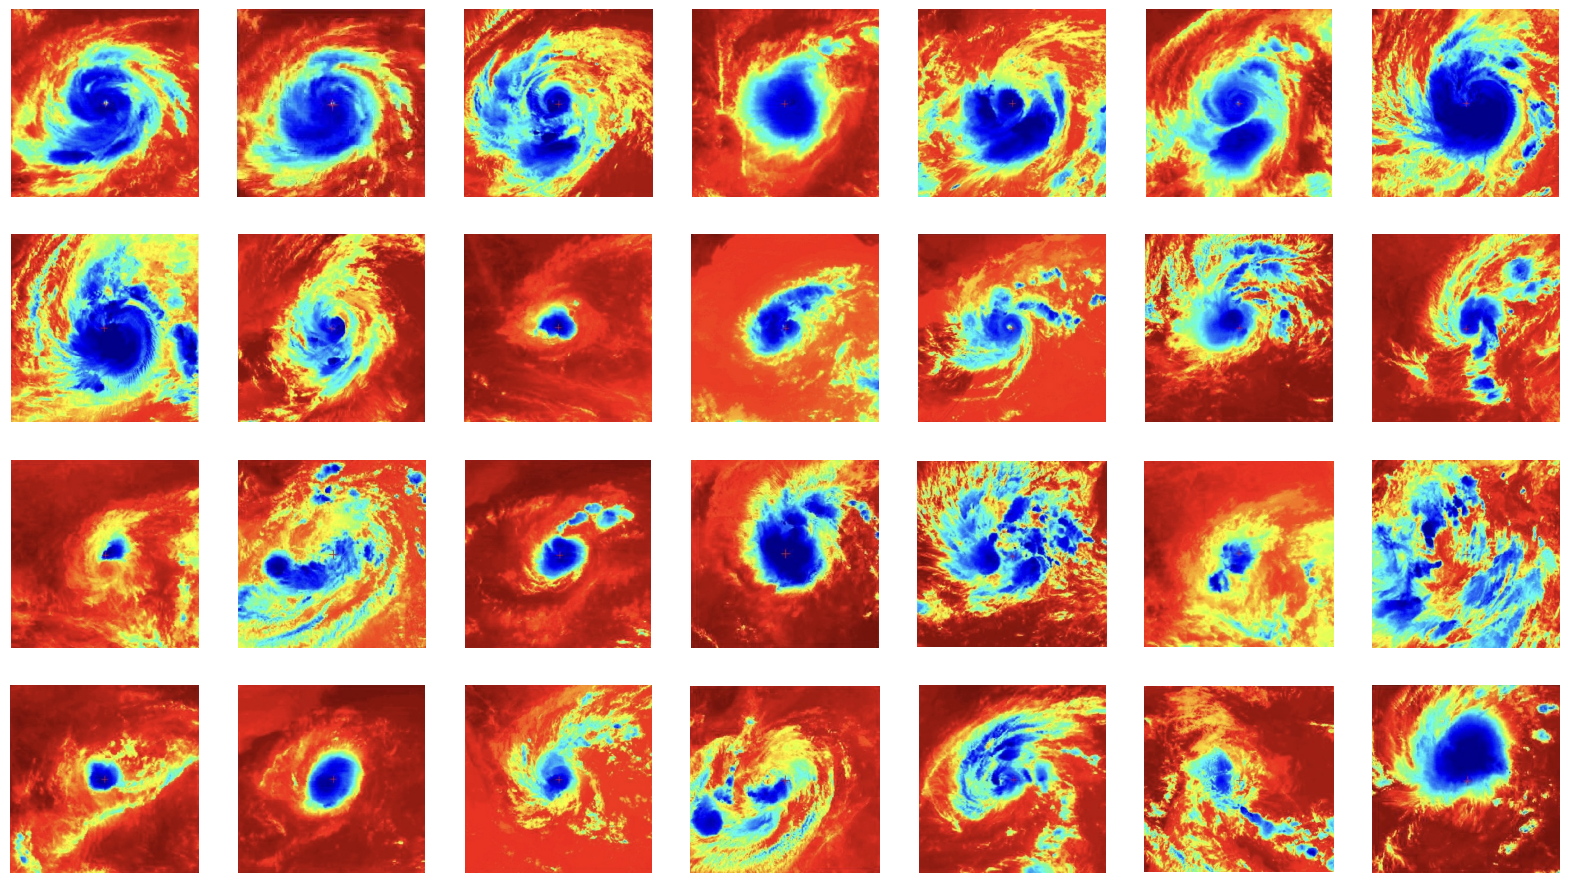

In [5]:
paths = glob.glob("CYCLONE_DATASET_INFRARED/*.jpg")
plt.figure(figsize=(20, 20))
for i in range(28):
    cur_img = mpimg.imread(paths[i]) 
    ax = plt.subplot(7, 7, i + 1)
    plt.imshow(cur_img.astype("uint8"))
    plt.axis("off")

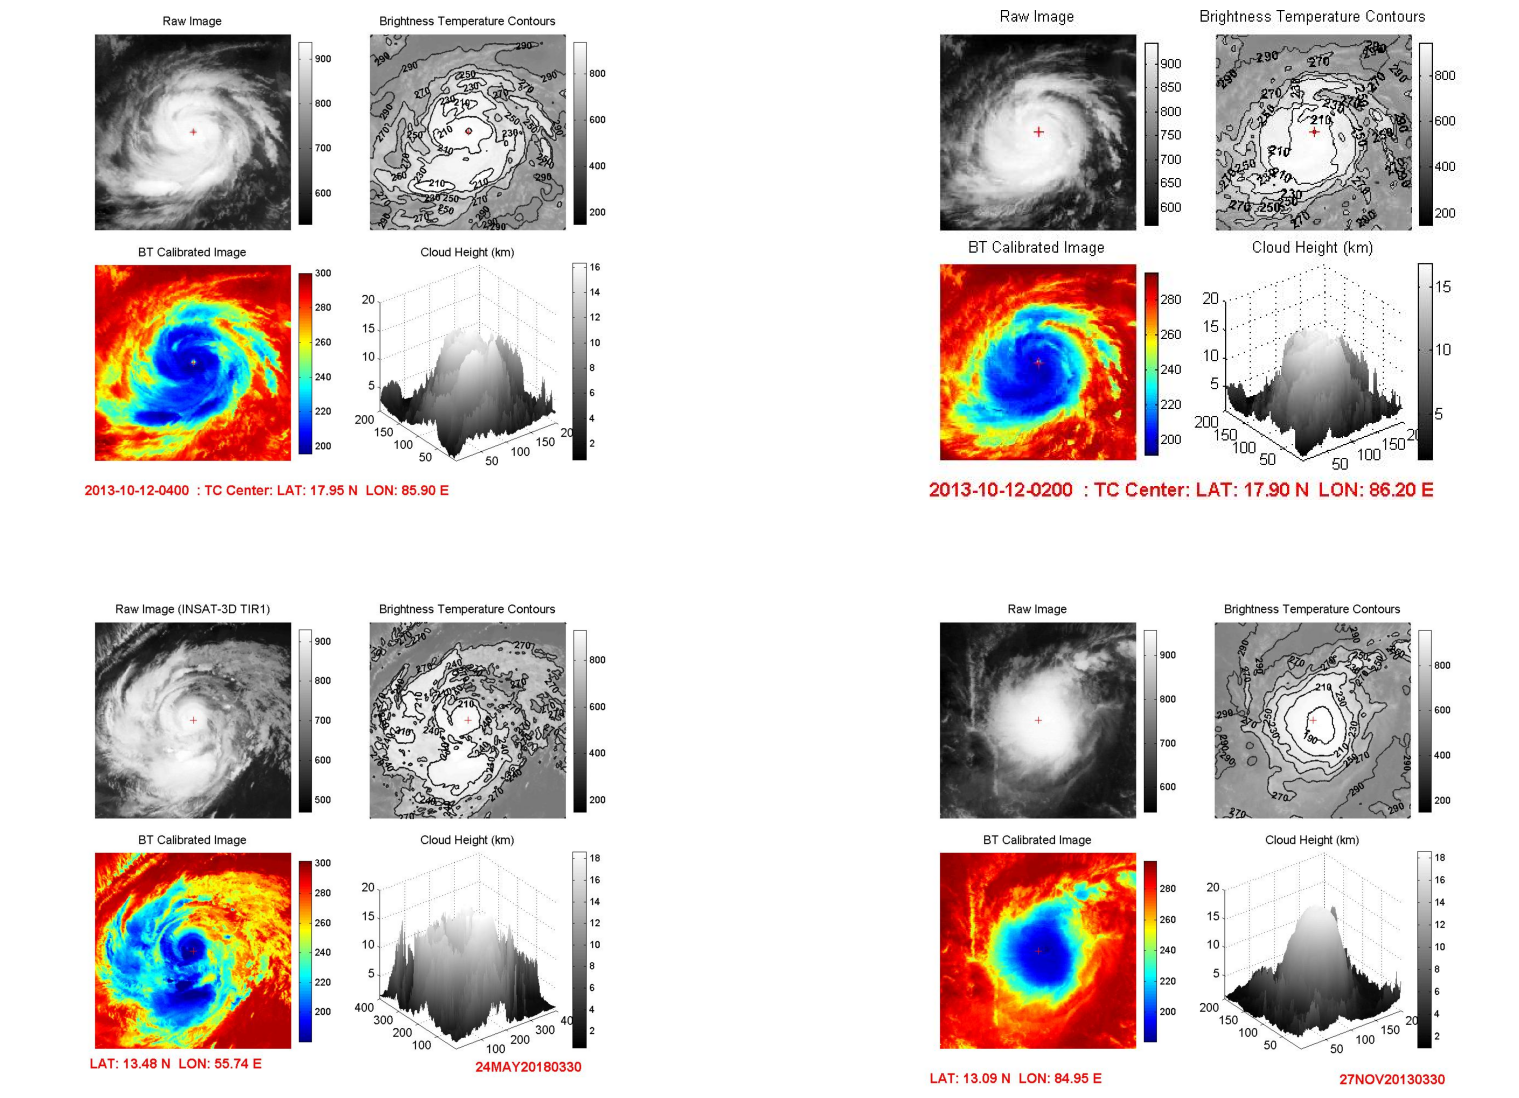

In [6]:
paths = glob.glob("CYCLONE_DATASET/*.jpeg")
plt.figure(figsize=(20, 14))
for i in range(4):
    cur_img = mpimg.imread(paths[i]) 
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(cur_img.astype("uint8"))
    plt.axis("off")

In [7]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [8]:
train_data = train_datagen.flow_from_dataframe(train,directory="CYCLONE_DATASET_INFRARED",subset="training",
                                               x_col="img_name",y_col="label",target_size=(512, 512),batch_size=16,class_mode='raw')

#val_data = train_datagen.flow_from_dataframe(train,directory="../input/insat3d-infrared-raw-cyclone-images-20132021/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED",subset="validation",
#                                               x_col="img_name",y_col="label",target_size=(512, 512),batch_size=16,class_mode='raw')

Found 136 validated image filenames.


In [9]:
for image_batch, labels_batch in train_data:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(16, 512, 512, 3)
(16,)


In [10]:
def build_model():
    base = tf.keras.applications.Xception(weights="imagenet", include_top=False, input_tensor=Input(shape=(512, 512, 3)))

    base.trainable = False

    flatten = base.output
    flatten = Flatten()(flatten)

    bboxHead = Dense(64, activation="relu")(flatten)
    bboxHead = Dense(32, activation="relu")(bboxHead)
    bboxHead = Dense(1, activation="linear")(bboxHead)

    model = Model(inputs=base.input, outputs=bboxHead)
    
    return model

In [11]:
model = build_model()

2024-11-17 16:43:02.818865: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1731861782.818922    2080 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3586 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae', metrics=[tf.keras.metrics.RootMeanSquaredError()])

save_best = tf.keras.callbacks.ModelCheckpoint("Model.keras", monitor='loss',save_best_only=True, verbose=1)

In [13]:
model.fit(train_data, epochs=50, callbacks=[save_best])

Epoch 1/50


I0000 00:00:1731861790.982090    2192 service.cc:148] XLA service 0x7fad9c03d270 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731861790.982129    2192 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-11-17 16:43:11.040261: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
E0000 00:00:1731861791.426478    2192 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
E0000 00:00:1731861791.475352    2192 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but s

FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/romeo/.local/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/romeo/.local/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/romeo/.local/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/romeo/.local/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/local/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/local/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/local/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/home/romeo/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/romeo/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/romeo/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/romeo/.local/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/romeo/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/romeo/.local/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/romeo/.local/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/romeo/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/romeo/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/romeo/.local/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/romeo/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/romeo/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/romeo/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_2080/402359677.py", line 1, in <module>

  File "/home/romeo/.local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/romeo/.local/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/home/romeo/.local/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_one_step_on_iterator_8253]